In [2]:
import numpy as np                        #importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel(r"C:\Users\DELL\Downloads\iris (1).xls")

In [4]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.shape

(150, 5)

In [7]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
df['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [11]:
df['Classification'].value_counts(normalize=True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Classification, dtype: float64

In [13]:
for i in['SL','SW','PL']:
    df[i]=df[i].fillna(df[i].median())
         

In [14]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [15]:
df.shape

(150, 5)

In [16]:
data=pd.get_dummies(df)

In [17]:
data.head()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,5.8,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [21]:
data.tail()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
145,6.7,3.0,5.20,2.3,0,0,1
146,6.3,2.5,5.00,1.9,0,0,1
147,6.5,3.0,4.35,2.0,0,0,1
148,6.2,3.4,5.40,2.3,0,0,1
149,5.9,3.0,5.10,1.8,0,0,1


In [23]:
data['Classification_Iris-setosa'].nunique()

2

In [18]:
data.shape

(150, 7)

<Axes: >

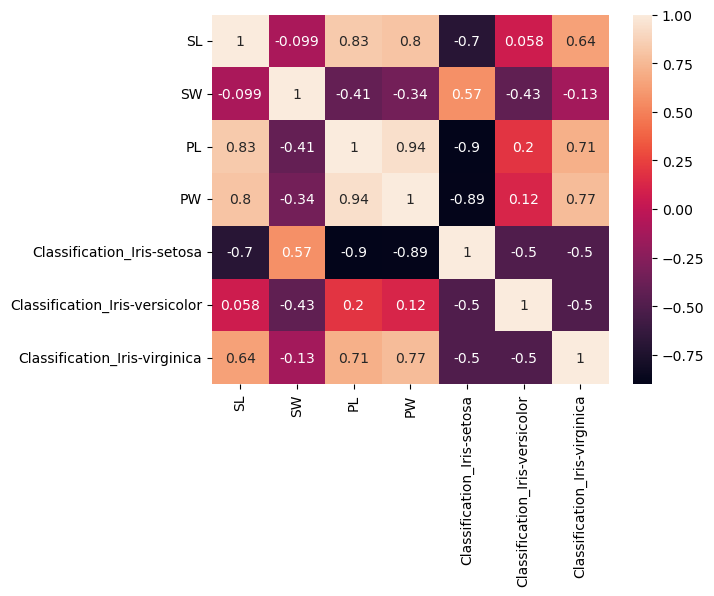

In [20]:
corrmatrix=data.corr()             #Finding the correlation between the 2 variables.
sns.heatmap(corrmatrix,annot=True)

In [24]:
y=data['Classification_Iris-virginica']                           
x=data.drop(['Classification_Iris-virginica'],axis=1)    

In [25]:
x.head()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,5.8,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classification_Iris-virginica, dtype: uint8

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=41)

In [28]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred_lr=logit_model.predict(x_test)

In [32]:
y_test,y_pred_lr

(119    1
 128    1
 135    1
 91     0
 112    1
 71     0
 123    1
 85     0
 147    1
 143    1
 127    1
 39     0
 38     0
 93     0
 23     0
 133    1
 30     0
 83     0
 37     0
 41     0
 81     0
 120    1
 43     0
 2      0
 64     0
 62     0
 56     0
 67     0
 49     0
 63     0
 Name: Classification_Iris-virginica, dtype: uint8,
 array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8))

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [31]:
print("Accuracy =",accuracy_score(y_test,y_pred_lr))

Accuracy = 1.0


In [33]:
print("precision =",precision_score(y_test,y_pred_lr))
print("recall =",recall_score(y_test,y_pred_lr))
print("f1-score =",f1_score(y_test,y_pred_lr))

precision = 1.0
recall = 1.0
f1-score = 1.0


In [34]:
confusion_matrix(y_test,y_pred_lr)

array([[20,  0],
       [ 0, 10]], dtype=int64)

In [35]:
y_pred_lr

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [41]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
metric=[]
neigbors=np.arange(3,15)
for k in neigbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric="minkowski",p=2)
    classifier.fit(x_train,y_train)
    y_pred_knn=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric.append(acc)
    

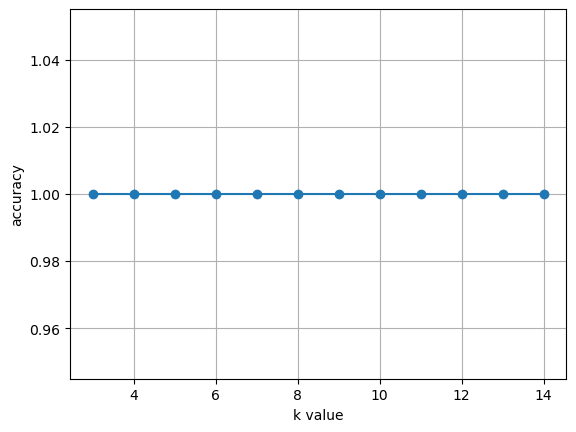

In [42]:
plt.plot(neigbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()